In [1]:
import numpy as np
import os
import pypianoroll
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt

### Converter musicas em "pypianoroll" e separar tracks do tipo "Guitar" em uma lista

In [2]:
music_files = []

for root, subFolders, files in os.walk(os.path.realpath("lpd_5")):
    if files:
        music_files.append(root + "/" + files[0])

In [3]:
_range = 500
pypianoroll_musics = []

for music in music_files[:_range]:
    pypianoroll_musics.append(pypianoroll.load(music))

> Dicionario que irá guardar a relação de compassos musicais -> enconder, e as informaçoes necessarias para converter a musica gerada para pypianoroll. a relação entre compassos e enconders será melhor explicada mais a frente

In [4]:
guitar_tracks = []

for music in pypianoroll_musics:
    for track in music.tracks:
        if track.name == 'Guitar':
            if len(track.pianoroll) > 0: 
                guitar_tracks.append(track) 

In [5]:
guitar_tracks[0].pianoroll

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

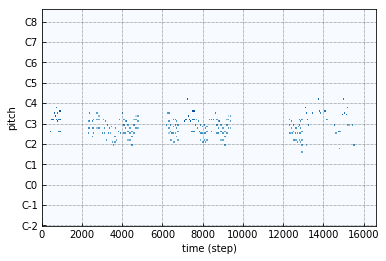

In [6]:
fig = guitar_tracks[0].plot()
plt.show()

### Redimensionar as músicas de modo que elas tenham tamanho de compasso = 10

> Como todas as músicas estão no mesmo tempo (4/4), cada compasso terá 4 notas. O dataset já veio formatado de modo que a duração das notas, para cada compasso, possuem 96 steps. Ou seja, cada nota possui uma duração (beat_resolution) igual a 24, pois 24 x 4 = 96

> Portanto, a fim de se possuir musicas pequenas para testes rapidos, formataremos nosso dataset de modo que cada música contenha apenas 10 compassos

In [7]:
def formatSongs(musics):
    for m in musics:
        m.pianoroll = m.pianoroll[384:1344,:] # faixa de steps para Nº compassos == 10

In [8]:
formatSongs(guitar_tracks)

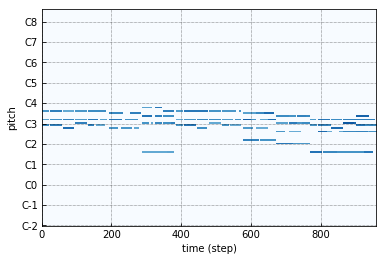

960


In [9]:
fig = guitar_tracks[6].plot()
plt.show()
print(len(guitar_tracks[6].pianoroll))

> Teremos 10 enconders. Cada musica esta dividida em 10 partições, e cada partição irá ser mapeada para um dos 10 encoders existentes. Depois, cada saida de cada enconder ira entrar em um "Enconder compilador", cuja função é unir todas as saidas dos 10 enconders anteriores. Por fim, este ultimo enconder irá gerar uma saida, que depois sera decodificada. Esse processo ocorrerá para todas as faixas de guitarra disponiveis

In [29]:
music_properties_mapper = {
    'e0' : [[]],
    'e1' : [[]],
    'e2' : [[]],
    'e3' : [[]],
    'e4' : [[]],
    'e5' : [[]],
    'e6' : [[]],
    'e7' : [[]],
    'e8' : [[]],
    'e9' : [[]],
}

> Separar, para cada enconder, a respectiva lista dos compassos das musicas a serem codificados. A ordem dos elementos das listas, para os diversos enconders do dicionario, ira respeitar a ordem dos compassos das musicas.

> Exemplo: e0[0] sera a parte '0' da musica '0'; e1[0] sera a parte '1' da musica '0', e assim por diante

In [11]:
for track in guitar_tracks:
    music = track.pianoroll
    for compass in range(10):
        left_limit = 96 * compass
        right_limit = 95 + 96 * compass
        music_encoder_mapper['e{}'.format(compass)].append(music[left_limit : right_limit])

> Função paara transformar um array de volta em um pypianoroll

In [24]:
"""
    Receives a numpy array that
    represents de music, and an Id,
    for music each music
"""

def arrayToPypianoroll(music, steps, beat_resolution, name):
    
     return Multitrack(tracks=music, tempo=steps, downbeat=None,
                 beat_resolution=beat_resolution, name=name)